# Projeto - Análise do dataset "Wine Quality"

## Informações sobre o projeto

O conjunto de dados utilizado pode ser encontrado em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

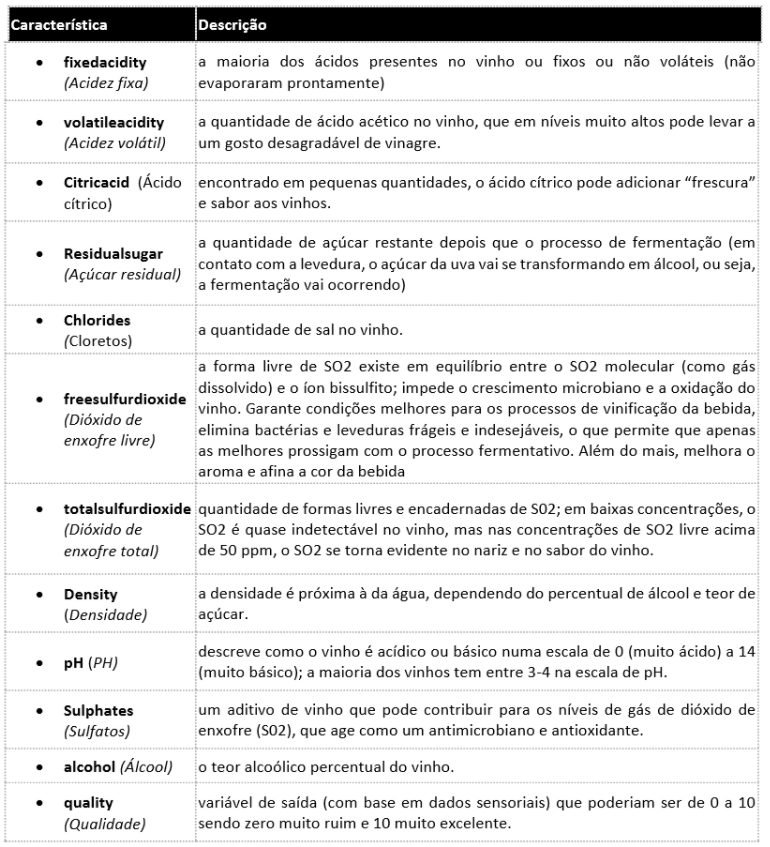

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import pearsonr
sns.set() # Definir o tema do Matplotlib como sendo o tema padrão do Seaborn
# set the graphs to show in the jupyter notebook
%matplotlib inline

## Etapa 1: Análise exploratória dos dados

In [102]:
df = pd.read_csv('winequality-red.csv', sep=";")
#df = pd.read_csv('winequality-white.csv', sep=";")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [105]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Visualização

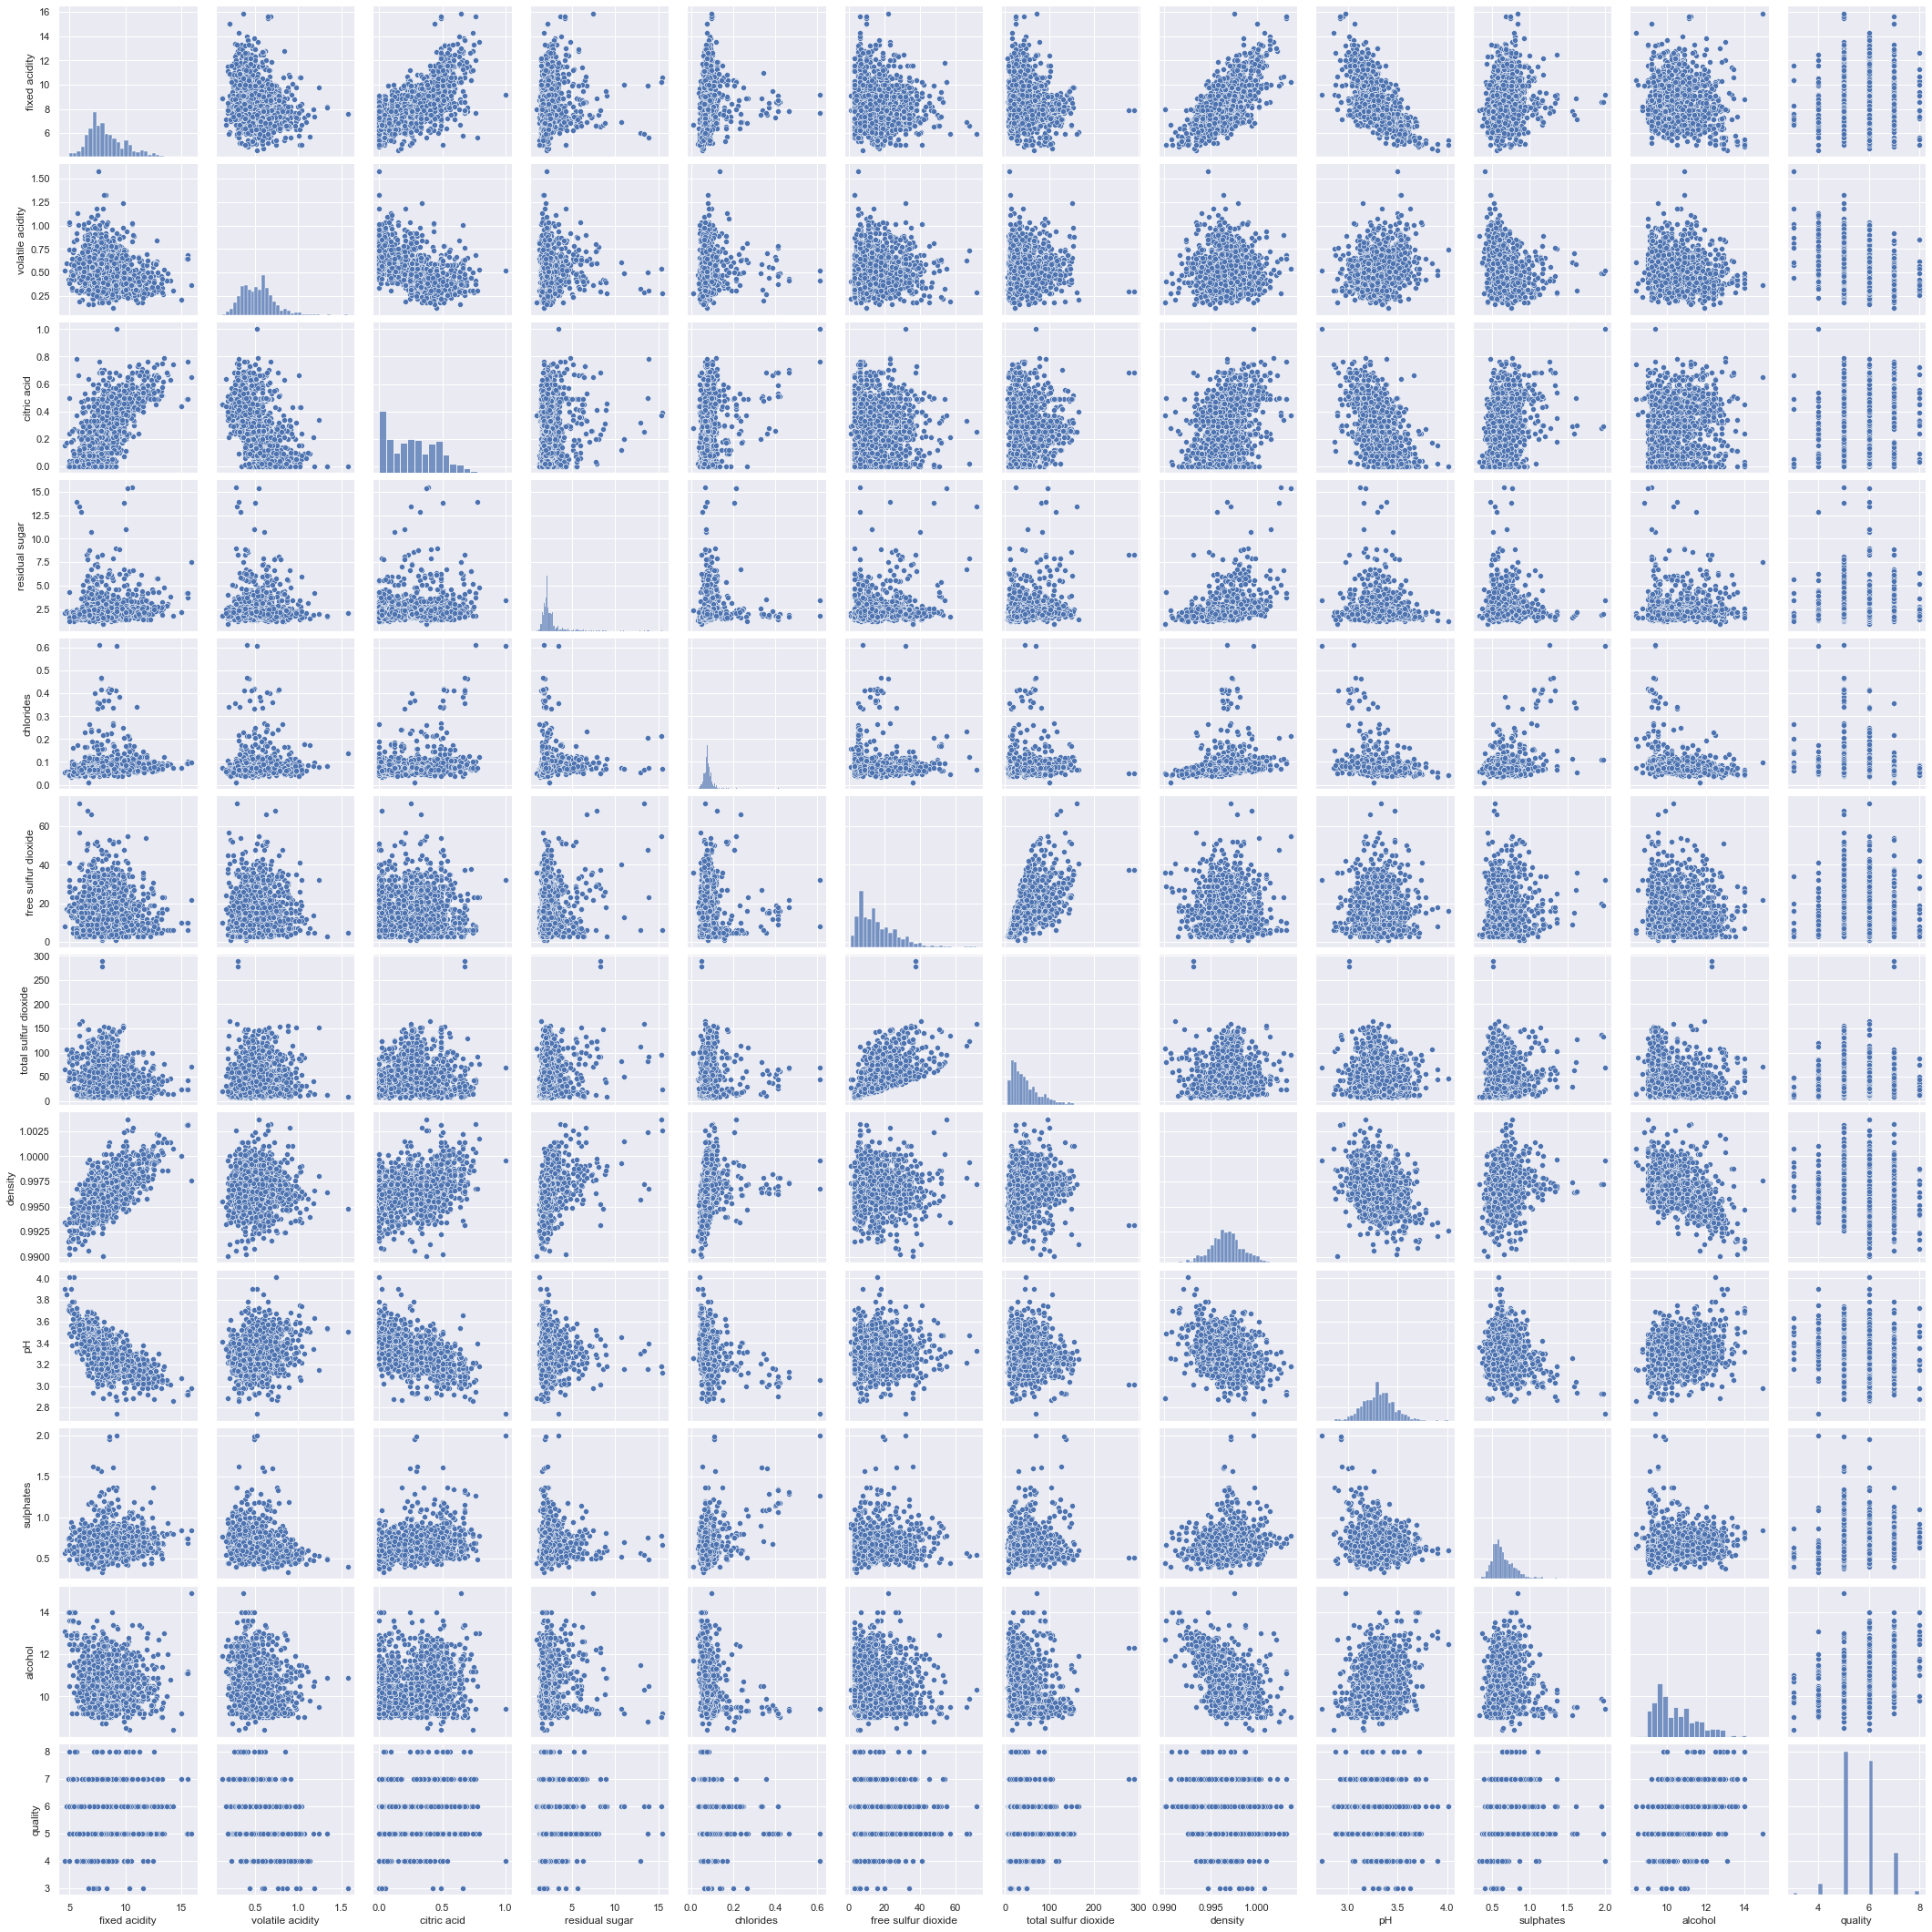

In [106]:
sns.pairplot(df)
plt.show()

In [107]:
lista_notas=list(df.quality.unique())
lista_notas=sorted(lista_notas)
print(lista_notas)

[3, 4, 5, 6, 7, 8]


In [108]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

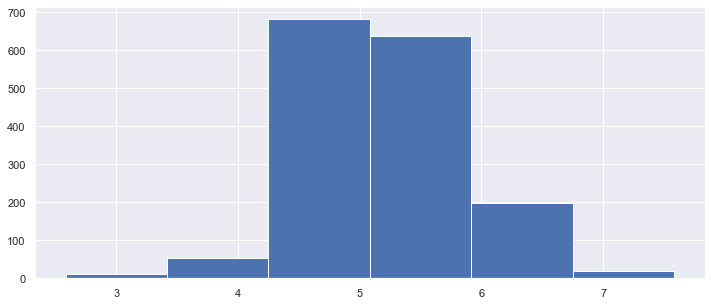

In [109]:
fig, axes = plt.subplots(1,1, figsize=(12, 5))
plt.hist(df.quality,bins=6,align='left');

**A grande maioria dos vinhos é mediana (notas 5 e 6). Poucos exempos de vinhos bons e ruins**

In [110]:
def classifica(x):
    if x<6:
        return 0
    else:
        return 1

In [111]:
df['qualidade']=df.quality.apply(classifica)

In [112]:
df.qualidade.value_counts()

1    855
0    744
Name: qualidade, dtype: int64

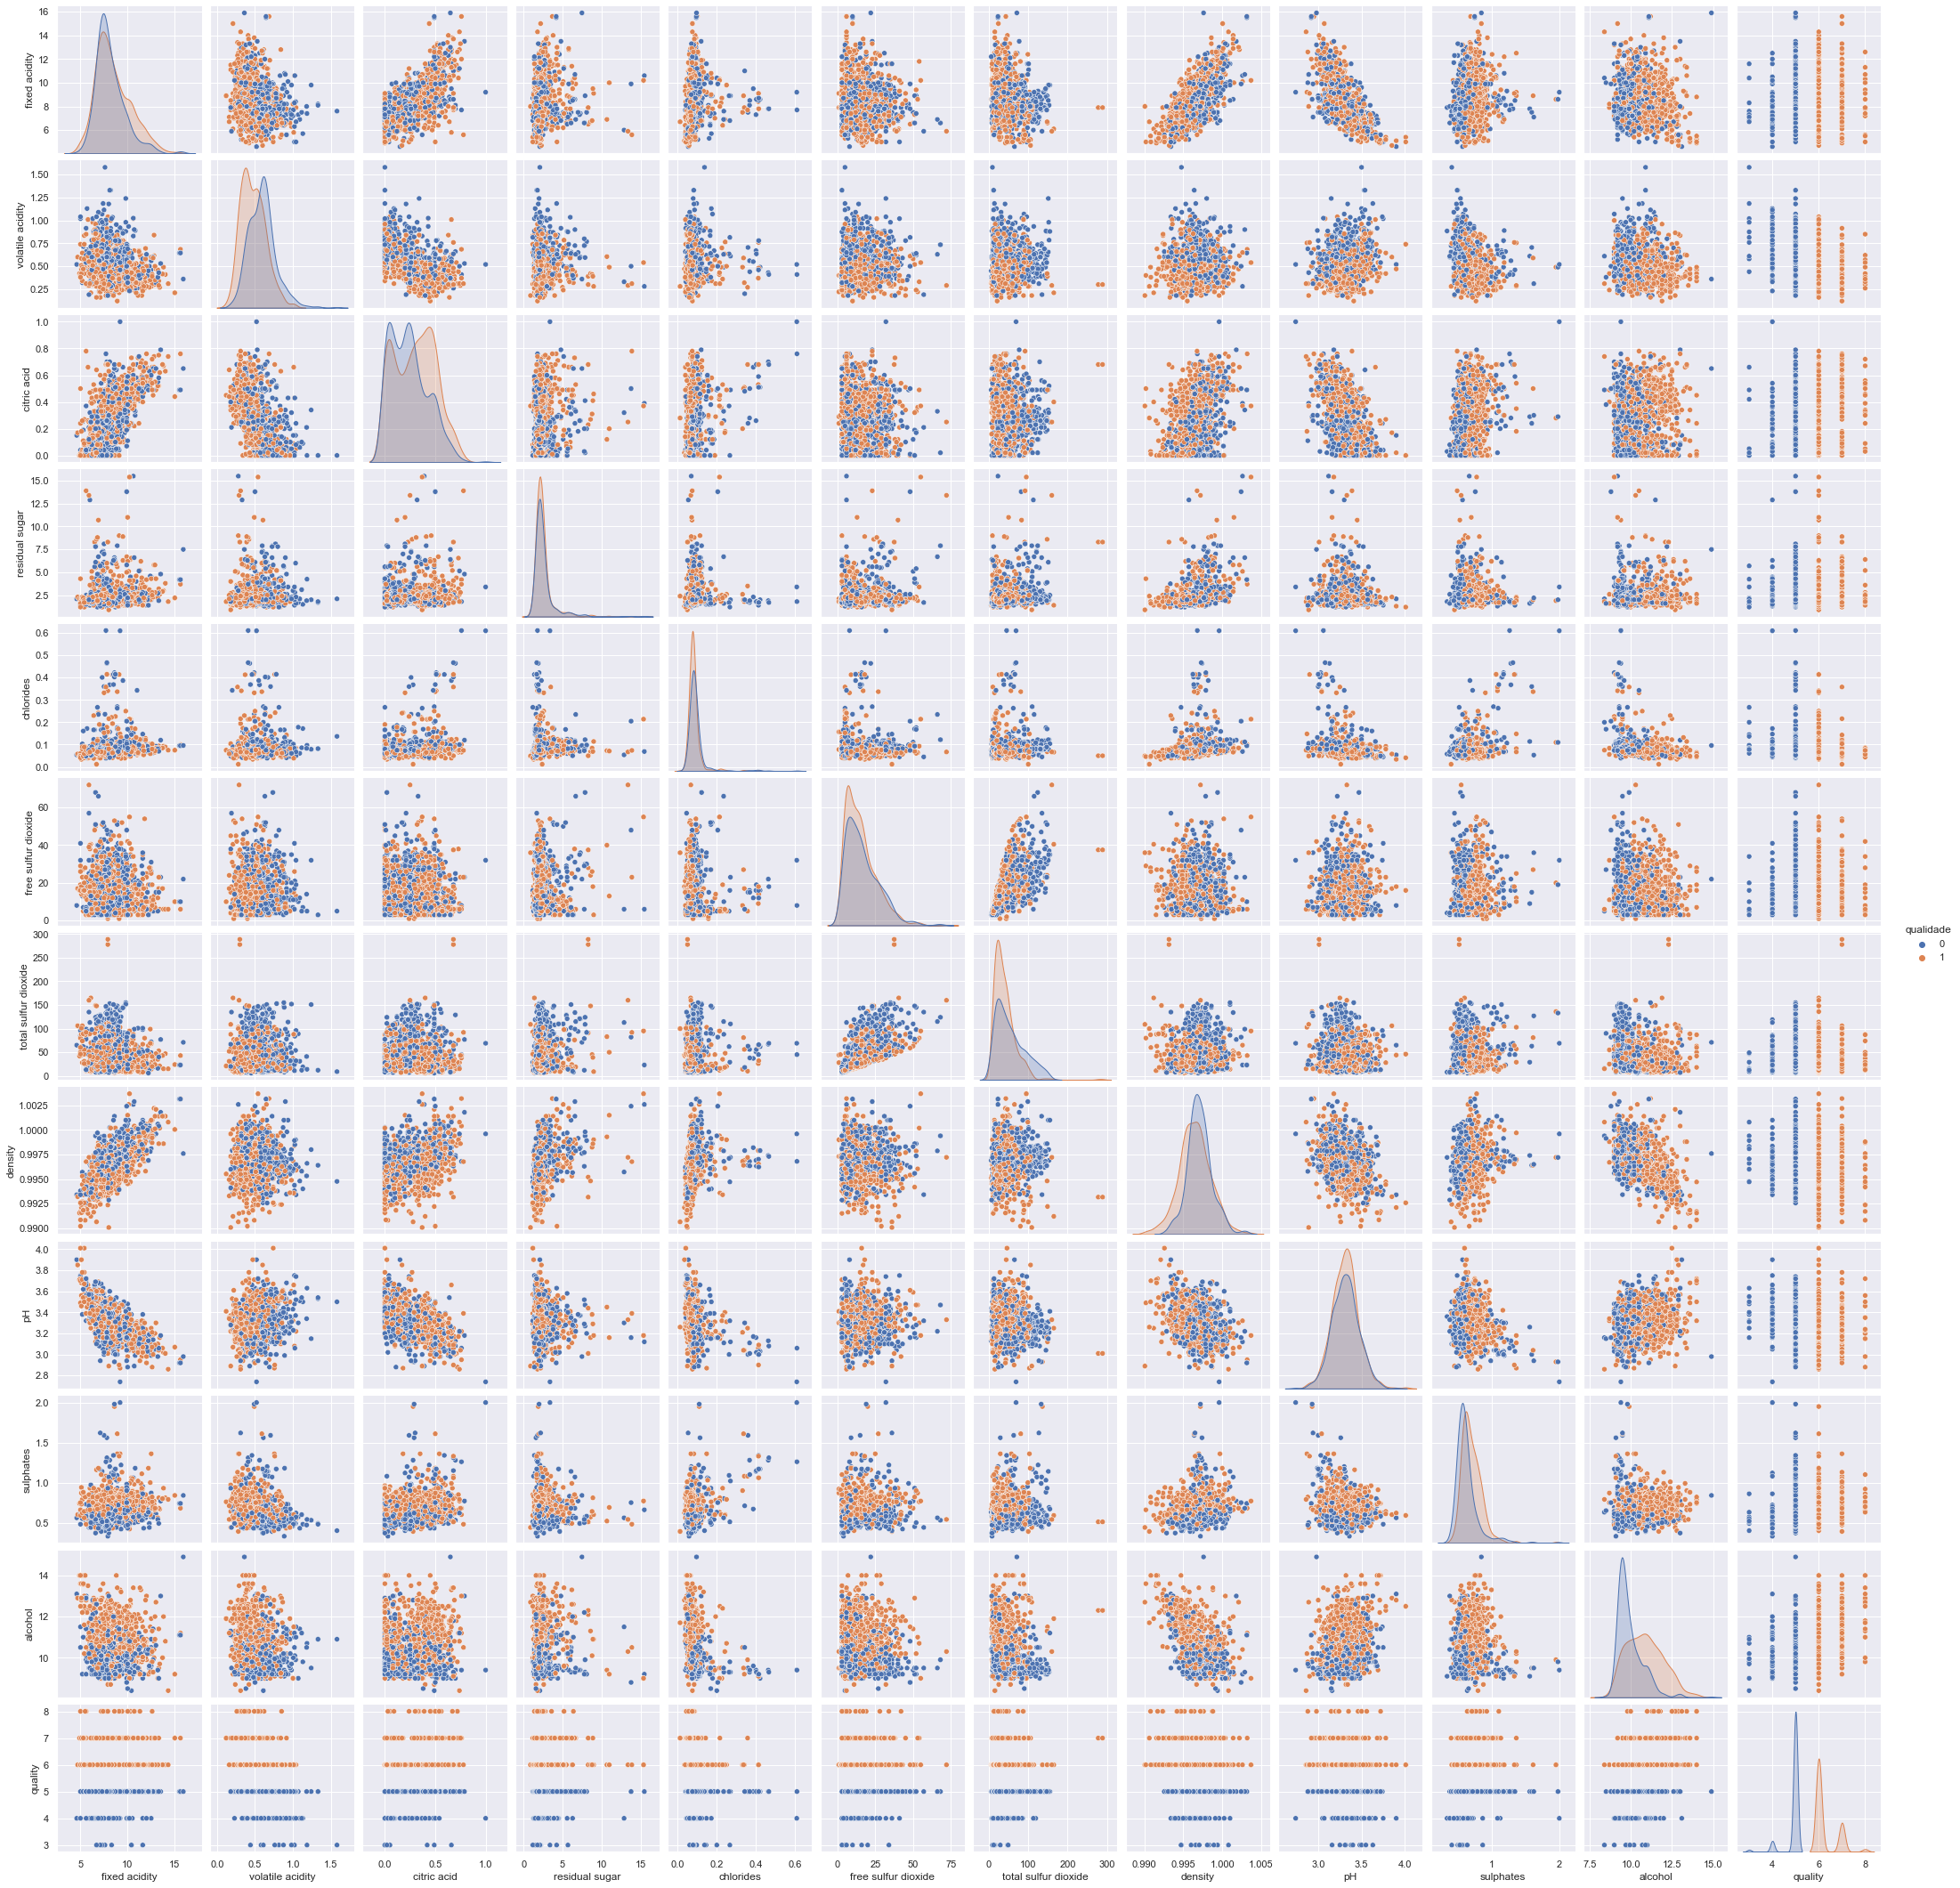

In [113]:
sns.pairplot(df, hue='qualidade')

**Correlação entre as variáveis**

In [114]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
qualidade                  0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
qualidade                  -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
qualidade                        -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol   quality  qualidade  
fixed acidity        -0.061668  0.124052   0.095093  
volatile acidity     -0.202288 -0.390558  -0.321441  
citric acid           0.109903  0.226373   0.159129  
residual sugar        0.042075  0.013732  -0.002160  
chlorides            -0.221141 -0.128907  -0.109494  
free sulfur dioxide  -0.069408 -0.050656  -0.061757  
total sulfur dioxide -0.205654 -0.185100  -0.231963  
density              -0.496180 -0.174919  -0.159110  
pH                    0.205633 -0.057731  -0.003264  
sulphates             0.093595  0.251397   0.218072  
alcohol               1.000000  0.476166   0.434751  
quality               0.476166  1.000000   0.848279  
qualidade             0.434751  0.848279   1.000000

<AxesSubplot:>

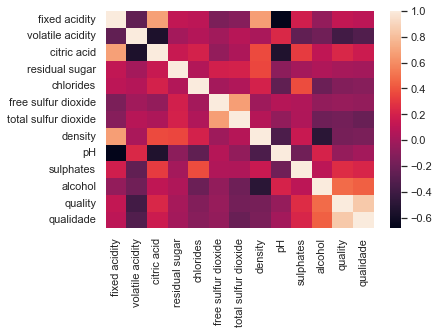

In [115]:
sns.heatmap(df.corr())

In [116]:
df.shape[1]

13

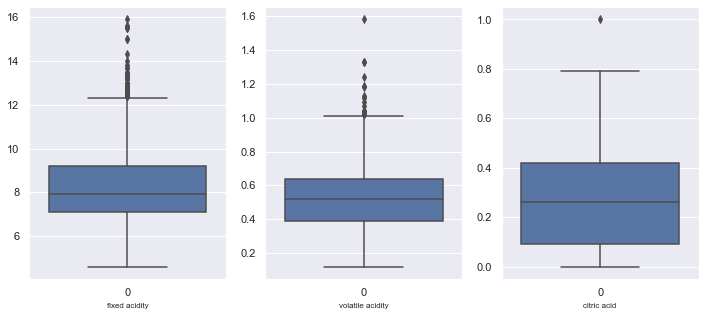

In [117]:
fig, axes = plt.subplots(1,3, figsize=(12, 5))
for i in range(3):

    sns.boxplot(ax=axes[i],data=df.iloc[:,i]);
    axes[i].set_xlabel(df.columns[i],fontsize=8)


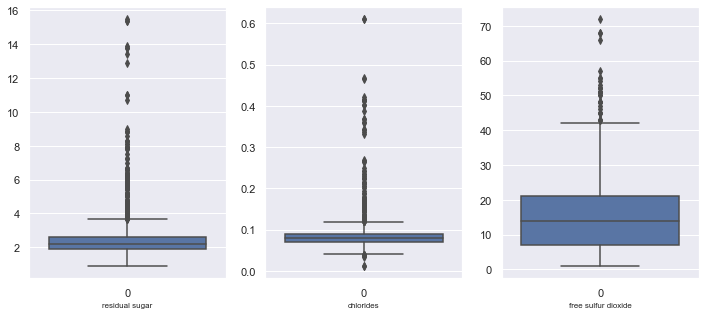

In [118]:
fig, axes = plt.subplots(1,3, figsize=(12, 5))
for i in range(3):

    sns.boxplot(ax=axes[i],data=df.iloc[:,i+3]);
    axes[i].set_xlabel(df.columns[i+3],fontsize=8)



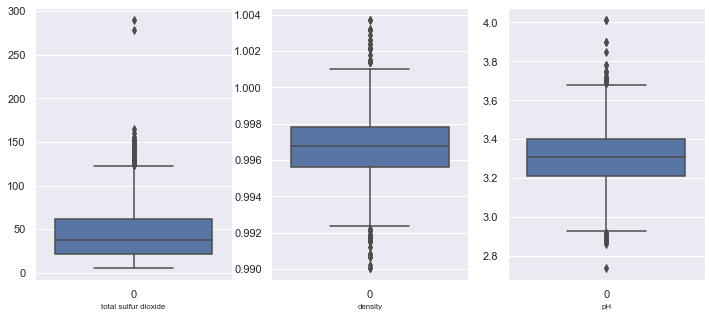

In [119]:
fig, axes = plt.subplots(1,3, figsize=(12, 5))
for i in range(3):

    sns.boxplot(ax=axes[i],data=df.iloc[:,i+6]);
    axes[i].set_xlabel(df.columns[i+6],fontsize=8)

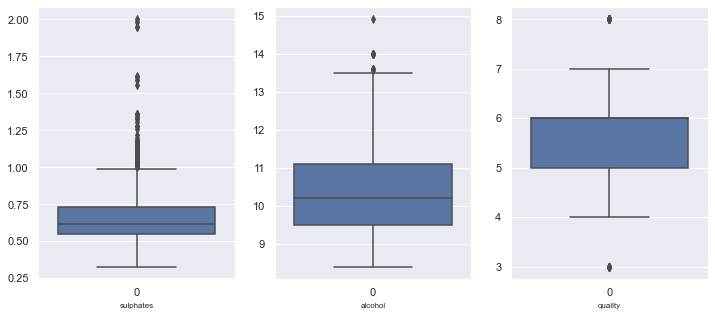

In [120]:
fig, axes = plt.subplots(1,3, figsize=(12, 5))
for i in range(3):

    sns.boxplot(ax=axes[i],data=df.iloc[:,i+9]);
    axes[i].set_xlabel(df.columns[i+9],fontsize=8)

## Etapa 2 Regressão Linear


### Fazendo uma regressão linear sem nenhum tratamento dos dados

In [121]:
y = df['quality'] # Variável resposta
X = df.drop(['quality','qualidade'], axis=1)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [122]:
# Separando os conjuntos de treino e de teste. Sendo 1/3 dos dados reservados para o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [123]:
lr_sem_tratamento = LinearRegression()

In [124]:
lr_sem_tratamento.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = lr_sem_tratamento.predict(X_test)
y_pred

array([5.5329017 , 5.36076959, 6.11188137, 5.72954917, 6.67207743,
       5.98794916, 6.22069517, 5.07391294, 5.73180388, 5.15773612,
       6.16618593, 5.35986991, 5.57913614, 6.45865101, 5.62331972,
       5.37553097, 5.95653051, 5.40355796, 5.59700982, 5.39983343,
       5.76835425, 6.2138157 , 5.37508109, 6.44242973, 5.43898747,
       6.26858811, 6.14492446, 5.63517311, 5.32192738, 5.76840447,
       5.24654974, 6.39820347, 5.20224704, 6.29984745, 4.89894109,
       5.745828  , 5.30181556, 5.3741832 , 6.3271794 , 5.07370302,
       6.05637783, 5.04216738, 5.22465244, 6.15166254, 5.11067357,
       5.78659549, 5.0955468 , 5.27370449, 5.07317504, 6.07789575,
       5.63883251, 5.4610183 , 6.27890419, 4.82790446, 5.09603542,
       5.9529259 , 6.06796592, 5.9448855 , 5.85898265, 5.24156587,
       6.28062047, 5.21725067, 5.30082945, 5.52735733, 4.61034491,
       5.41320041, 6.64757541, 5.65727604, 5.8025448 , 6.42172226,
       4.89894109, 6.34816112, 5.68492264, 5.75667512, 5.38719

In [126]:
y_test


75      5
1283    6
408     6
1281    6
1118    6
       ..
1382    5
216     5
1114    6
395     7
821     7
Name: quality, Length: 528, dtype: int64

In [127]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [128]:
lr_sem_tratamento.score(X, y)

0.3584672762069585

In [129]:
# Calculo do resíduo
(y_test-y_pred).mean()

-0.013958075092866742

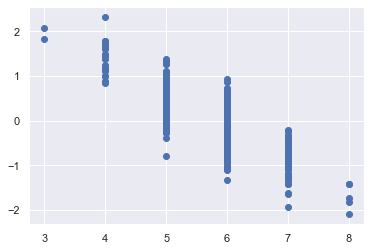

In [132]:
plt.scatter(y_test, y_pred-y_test)

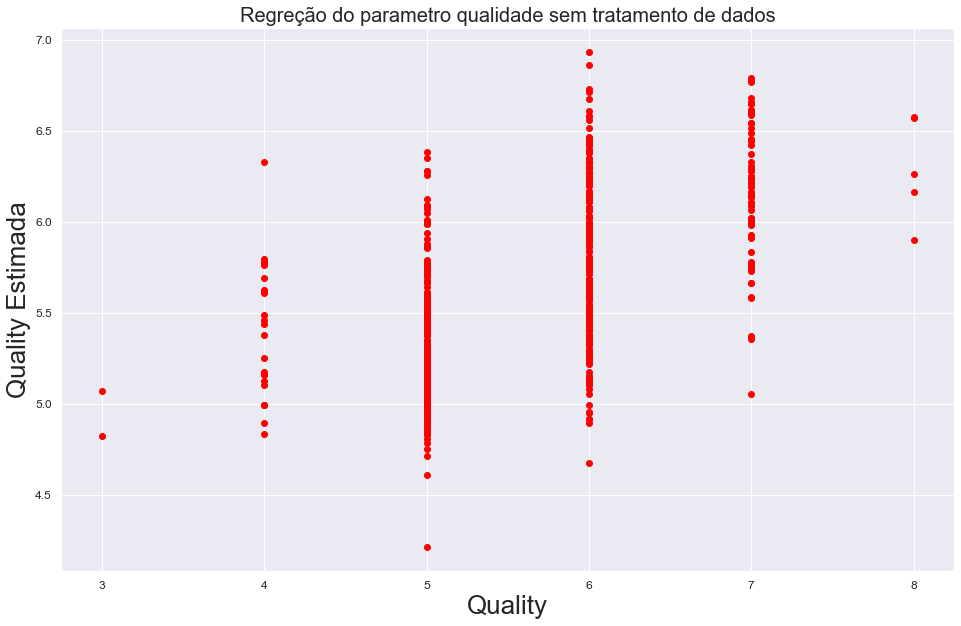

In [134]:
plt.figure(figsize=(16,10))
plt.scatter(y_test,y_pred,color='red')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Regreção do parametro qualidade sem tratamento de dados",fontsize=20)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Quality Estimada',fontsize=26)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

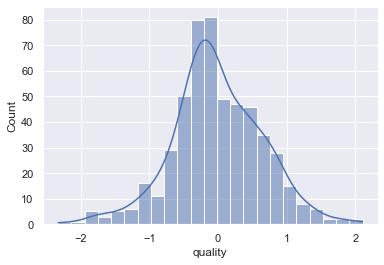

In [135]:
sns.histplot(y_test-y_pred, kde=True)

## Fazendo uma correlação linear removendo outliers

In [ ]:
plt.figure(figsize=(20,10));
df.drop(['quality','qualidade'], axis=1).boxplot();
plt.xticks(rotation =45,fontsize=14);
plt.xticks(rotation =45,fontsize=14);

In [ ]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [ ]:
colunas = list(df.drop(['quality','qualidade'], axis=1).columns)
colunas

In [ ]:
df_out=df.copy()

for coluna in colunas:
    inf, sup = calc_min_and_max_range(df_out[coluna])
    df_out = df_out[(df_out[coluna] > inf) & (df_out[coluna] < sup)]

In [ ]:
df
df.shape

In [ ]:
df_out
df_out.shape

In [ ]:
plt.figure(figsize=(20,10));
df_out.drop(['quality','qualidade'], axis=1).boxplot();
plt.xticks(rotation =45,fontsize=14);
plt.xticks(rotation =45,fontsize=14);

In [ ]:
y_out = df_out['quality'] # Variável resposta
X_out = df_out.drop(['quality','qualidade'], axis=1)
X_out.head()

In [ ]:
lr_out = LinearRegression()
lr_out.fit(X_out, y_out)

In [ ]:
lr_out.score(X_out, y_out)

In [ ]:
y_pred_out = lr_out.predict(X_out)

In [ ]:
plt.scatter(y_out, y_pred_out-y_out)

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(y_out,y_pred_out,color='blue',label='Filtrado')
plt.scatter(y,y_pred,color='red',label='Dados originais',alpha=0.1)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Regreção do parametro qualidade com remoção de outliers dos paramêtros",fontsize=20)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Quality Estimada',fontsize=26)
plt.legend(fontsize=14)
plt.show()

In [ ]:
sns.histplot(y-y_pred, kde=True)

## Olhando melhor as três variaveis com maior correlação com a saída qualidade --> Volatile acidity | Alcohol | Sulphates

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(y='volatile acidity',x='quality',data=df_out)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of volatile acidity on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Volatile Acidity',fontsize=26)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(y='alcohol',x='quality',data=df_out)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of alcohol on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('alcohol',fontsize=26)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(y='sulphates',x='quality',data=df_out)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of sulphates on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('sulphates',fontsize=26)
plt.show()

In [ ]:
y_3_var = df_out['quality'] # Variável resposta
X_3_var = df_out.loc[:,['volatile acidity','alcohol','sulphates']] # Variáveis explicativas
X_3_var.head()

In [ ]:
lr_3_var = LinearRegression()

In [ ]:
lr_3_var.fit(X_3_var, y_3_var)

In [ ]:
lr_3_var.intercept_ # intercepto (Beta 0)

In [ ]:
lr_3_var.coef_

In [ ]:
y_pred_3_var = lr_3_var.predict(X_3_var)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_3_var, y_pred_3_var)

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(y_3_var,y_pred_3_var,color='green',label='Usando as 3 variáveis')

plt.scatter(y_out,y_pred_out,color='blue',label='Sem outlier',alpha=0.1)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Regreção do parametro qualidade usando as 3 variáveis com maior correlação",fontsize=20)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Quality Estimada',fontsize=26)
plt.legend(fontsize=14)
plt.show()

In [ ]:
sns.histplot(y_3_var - y_pred_3_var, kde=True),

# Transformando dados

In [ ]:
df_log = df_out.loc[:,['volatile acidity','alcohol','sulphates','quality']].copy()

In [ ]:
df_log['volatile acidity'] = np.log(df_log['volatile acidity'])
df_log['alcohol'] = np.log(df_log['alcohol'])
df_log['sulphates'] = np.log(df_log['sulphates'])
df_log['quality'] = np.log(df_log['quality'])

In [ ]:
df_log.head()

In [ ]:
y_3_log = df_log['quality'] # Variável resposta
X_3_log = df_log.loc[:,['volatile acidity','alcohol','sulphates']] # Variáveis explicativas
X_3_log.head()

In [ ]:
lr_3_log = LinearRegression()

In [ ]:
lr_3_log.fit(X_3_log, y_3_log)

In [ ]:
y_pred_3_log = lr_3_log.predict(X_3_log)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_3_log, y_pred_3_log)

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(y_3_var,y_pred_3_var,color='green',label='Usando as 3 variáveis',alpha=0.1)

plt.scatter(np.exp(y_3_log), np.exp(y_pred_3_log),color='black',label='Usando o Log')
            
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Regreção transformando 3 variaveis para log",fontsize=20)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Quality Estimada',fontsize=26)
plt.legend(fontsize=14)
plt.show()

# Transformação 2

In [ ]:
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])

In [ ]:
df_transformado=df_out.copy()
df_transformado.drop(columns='qualidade',inplace=True)

In [ ]:
df_transformado

In [ ]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())


In [ ]:
colunas=list(df_transformado.columns)
colunas.remove('quality')
colunas

In [ ]:
for col in colunas:
    df_transformado[col] = min_max_scaling(df_transformado[col])

In [ ]:
df_transformado

In [ ]:
sns.pairplot(df_transformado)

In [ ]:
df_transformado.describe()

In [ ]:
y_transformado = df_transformado['quality'] # Variável resposta
X_transformado = df_transformado.drop(['quality'], axis=1)
X_transformado.head()

In [ ]:
lr_transformado = LinearRegression()

In [ ]:
lr_transformado.fit(X_transformado, y_transformado)

In [ ]:
y_pred_transformado = lr_transformado.predict(X_transformado)
y_pred_transformado

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_transformado, y_pred_transformado)

In [ ]:
plt.figure(figsize=(16,10))
plt.scatter(y_transformado,y_pred_transformado,color='magenta',label='Transformação 2',alpha=0.8)
plt.scatter(y_out,y_pred_out,color='blue',label='Sem outlier',alpha=0.1)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Regreção transformando 3 variaveis para log",fontsize=20)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Quality Estimada',fontsize=26)
plt.legend(fontsize=14)
plt.show()

# Etapa 3. Regressáo Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_reg = df_out.drop(['quality','qualidade'], axis=1)
X_reg


In [ ]:
y_reg  = df_out['qualidade'] # Variável resposta
y_reg 

In [ ]:
#Dividindo os dados de treino e de teste por meio da função "train_test_split", do módulo sklearn.model_selection 
#(nesse caso, 80% para treino e 20% para teste)
X_train,X_test,y_train,y_test=train_test_split(X_reg ,y_reg ,test_size=0.2,random_state=0)


#instanciando a classe LogisticRegression
model = LogisticRegression()

#Treinando o modelo (fittando o modelo)
model.fit(X_train, y_train)

#Previsões
y_pred = model.predict(X_test)
y_pred

In [ ]:
model.coef_, model.intercept_

In [ ]:
#Matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

In [ ]:
#Plottando a matriz de confusão
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))